In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [2]:
tic = time.time()

In [3]:
flights = pd.read_csv('data/flights_clean.csv')
flights

,airline,day,day_of_week,departure_delay,destination_airport,destination_latitude,destination_longitude,distance,month,origin_airport,...,scheduled_arrival,scheduled_departure,scheduled_time,state_destination,state_origin,taxi_in,taxi_out,day_of_year,origin_temperature,destination_temperature
0,AS,1,4,-11.0,SEA,47.44898,-122.30931,1448,1,ANC,...,270,5,205.0,WA,AK,4.0,21.0,1,35.2,32.9
1,AS,1,4,-4.0,SEA,47.44898,-122.30931,1448,1,ANC,...,309,45,204.0,WA,AK,4.0,17.0,1,35.2,32.9
2,DL,1,4,-14.0,SEA,47.44898,-122.30931,1448,1,ANC,...,315,45,210.0,WA,AK,4.0,25.0,1,35.2,32.9
3,AS,1,4,-15.0,SEA,47.44898,-122.30931,1448,1,ANC,...,393,115,218.0,WA,AK,11.0,17.0,1,35.2,32.9
4,AS,1,4,-11.0,SEA,47.44898,-122.30931,1448,1,ANC,...,400,140,200.0,WA,AK,8.0,15.0,1,35.2,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031914,EV,27,5,77.0,ROA,37.32547,-79.97543,357,11,ATL,...,648,565,83.0,VA,GA,3.0,9.0,331,59.7,49.4
4031915,EV,27,5,-6.0,ROA,37.32547,-79.97543,357,11,ATL,...,985,902,83.0,VA,GA,5.0,21.0,331,59.7,49.4
4031916,DL,27,5,-1.0,ROA,37.32547,-79.97543,357,11,ATL,...,1162,1079,83.0,VA,GA,6.0,22.0,331,59.7,49.4
4031917,EV,19,6,88.0,ABE,40.65236,-75.44040,692,12,ATL,...,934,821,113.0,PA,GA,3.0,22.0,353,37.8,35.6


In [4]:
flights.iloc[0]

airline                           AS
day                                1
day_of_week                        4
departure_delay                -11.0
destination_airport              SEA
destination_latitude        47.44898
destination_longitude     -122.30931
distance                        1448
month                              1
origin_airport                   ANC
origin_latitude             61.17432
origin_longitude          -149.99619
scheduled_arrival                270
scheduled_departure                5
scheduled_time                 205.0
state_destination                 WA
state_origin                      AK
taxi_in                          4.0
taxi_out                        21.0
day_of_year                        1
origin_temperature              35.2
destination_temperature         32.9
Name: 0, dtype: object

In [5]:
pre_y = flights.departure_delay

In [6]:
pre_X = flights.drop(columns=['departure_delay', 'airline', 'destination_airport',
                              'origin_airport', 'state_destination', 'state_origin'])

In [7]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [8]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [9]:
alphas = 10**np.linspace(10,-2,200)*0.5

In [10]:
# Find ridge coeffs for all lambda values
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

Text(0, 0.5, 'Standardized coefficient')

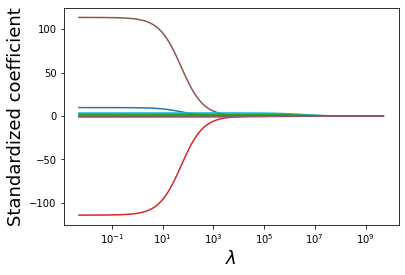

In [11]:
# Visualize shrinking regression coefficients with lambda increase
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [12]:
# Cross validation to find optimal lambda
alphas = 10**np.linspace(2,-2,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

0.052978008963880795

Text(0, 0.5, 'Cross-validation error')

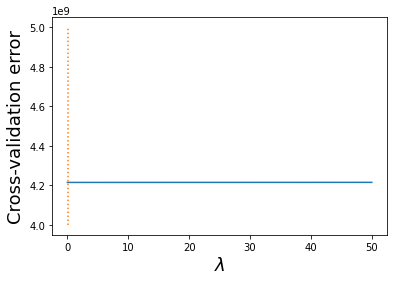

In [13]:
# Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[4e9,5e9],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

Text(0, 0.5, 'Standardized coefficient')

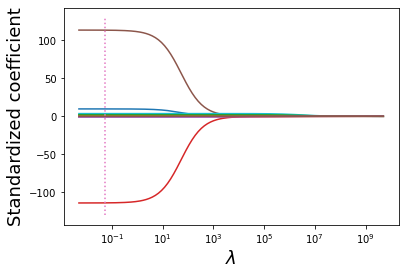

In [14]:
# Visualize with the optimal lambda
alphas = 10**np.linspace(10,-2,200)*0.5
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[-130,130],':')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [15]:
Xtest_std = scaler.transform(X_test)

In [16]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

In [17]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

37.62749644382159

In [18]:
y_test.std()

37.99792751004556

In [19]:
#Checking the coefficients of the ridge regression model
ridge.coef_

array([ 9.67336359e+00, -6.99751053e-01, -2.12907868e-01,  4.60353443e-01,
       -1.02435141e+00,  1.13271300e+02, -6.68636377e-01,  1.81000536e-01,
        1.37272195e+00,  3.53349356e+00,  1.67925016e+00,  5.09408822e-01,
        2.02619540e+00, -1.13910823e+02, -8.23230357e-01, -8.38229735e-02])

In [20]:
#R-squared on train data for the ridge regression model
r2_score(ridge.predict(Xstd),y)

-48.202306464416814

In [21]:
#R-squared on test data for the ridge regression model
r2_score(pred,y_test)

-48.991206934244516

In [22]:
toc = time.time()
toc - tic

133.0717477798462

In [23]:
tic_dummy = time.time()

In [24]:
flights = pd.read_csv('data/flights_clean_numerical.csv').sample(10000)
flights

,day,day_of_week,departure_delay,destination_latitude,destination_longitude,distance,month,origin_latitude,origin_longitude,scheduled_arrival,...,state_origin_SD,state_origin_TN,state_origin_TX,state_origin_UT,state_origin_VA,state_origin_VT,state_origin_WA,state_origin_WI,state_origin_WV,state_origin_WY
3594584,3,2,-4.0,33.94254,-118.40807,2475,3,40.63975,-73.77893,587,...,0,0,0,0,0,0,0,0,0,0
1729549,24,2,57.0,29.98047,-95.33972,517,2,35.21937,-101.70593,497,...,0,0,1,0,0,0,0,0,0,0
2078475,10,5,-1.0,40.49147,-80.23287,366,4,35.21401,-80.94313,976,...,0,0,0,0,0,0,0,0,0,0
1537479,29,4,2.0,39.49858,-119.76806,391,1,33.94254,-118.40807,780,...,0,0,0,0,0,0,0,0,0,0
2456570,3,3,2.0,40.77724,-73.87261,725,6,41.78598,-87.75242,855,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981270,26,6,20.0,41.72400,-71.42822,842,9,41.78598,-87.75242,1435,...,0,0,0,0,0,0,0,0,0,0
2016028,2,4,-2.0,28.42889,-81.31603,957,4,42.21206,-83.34884,787,...,0,0,0,0,0,0,0,0,0,0
1262801,16,3,14.0,39.85841,-104.66700,602,12,33.43417,-112.00806,859,...,0,0,0,0,0,0,0,0,0,0
3725037,22,2,32.0,41.30252,-95.89417,821,12,33.64044,-84.42694,575,...,0,0,0,0,0,0,0,0,0,0


In [25]:
flights.iloc[0]

day                        3.00000
day_of_week                2.00000
departure_delay           -4.00000
destination_latitude      33.94254
destination_longitude   -118.40807
                           ...    
state_origin_VT            0.00000
state_origin_WA            0.00000
state_origin_WI            0.00000
state_origin_WV            0.00000
state_origin_WY            0.00000
Name: 3594584, Length: 407, dtype: float64

In [26]:
pre_y = flights.departure_delay

In [27]:
pre_X = flights.drop(columns=['departure_delay'])

In [28]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [29]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [30]:
alphas = 10**np.linspace(10,-2,200)*0.5

In [31]:
# Find ridge coeffs for all lambda values
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

Text(0, 0.5, 'Standardized coefficient')

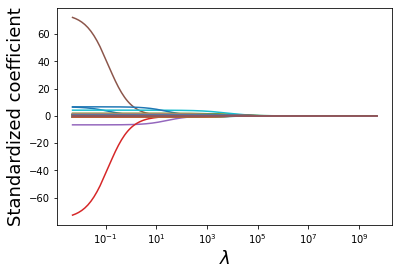

In [32]:
# Visualize shrinking regression coefficients with lambda increase
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [33]:
# Cross validation to find optimal lambda
alphas = 10**np.linspace(5,-2,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

12617.695852173829

Text(0, 0.5, 'Cross-validation error')

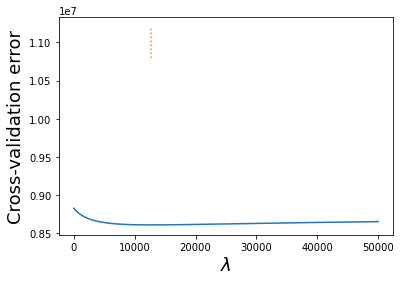

In [34]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[1e6,1e7],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

Text(0, 0.5, 'Standardized coefficient')

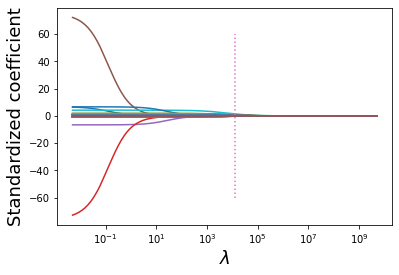

In [35]:
# Visualize with the optimal lambda
alphas = 10**np.linspace(10,-2,200)*0.5
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[-70,70],':')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [36]:
Xtest_std = scaler.transform(X_test)

In [37]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

In [38]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

42.077936562641334

In [39]:
y_test.std()

42.1853562264441

In [40]:
#Checking the coefficients of the ridge regression model
#ridge.coef_

In [41]:
#R-squared on train data for the ridge regression model
r2_score(ridge.predict(Xstd),y)

-64.37867395536149

In [42]:
#R-squared on test data for the ridge regression model
r2_score(pred,y_test)

-106.09287633596676

In [43]:
toc_dummy = time.time()
toc_dummy - tic_dummy

92.81470108032227